# Ford Gobike System Data Exploration

## Data Wrangling

The document explores a dataset containing 519700 trip records from Bay Wheel in 2017.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [4]:
trip = pd.read_csv('2017-fordgobike-tripdata.csv')

In [5]:
# high-level overview of data shape and composition
print(trip.shape)
print(trip.dtypes)

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object


In [6]:
trip.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [7]:
print(trip.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.00000

### Structure of dataset

There are 519,700 trips in the dataset with 13 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type). Most variables are numeric in nature, some categorical variable like user type and station name. There's no ordered factor variables in this dataset. <br>
Note: I noticed that in the original dataset, time variables like start_time and end_time are in object format, instead of datetime format. 

### Features of Interest

I am particulary interested in the duration of the trip and factors that might have effect on this variable.<br> 
I suppose that variables such as start_time(might be related to some peak usage periode), start_station (might be related to usage purpose: work or entertainment for instance) and user_type. 

First of all, as noticed, the datatype for some variable of interest are not correct, I will clean them right away before exploration,



In [8]:
trip[['start_time','end_time']] = trip[['start_time','end_time']].apply(pd.to_datetime)

In [9]:
# check the result
trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 51.5+ MB


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration_sec. 

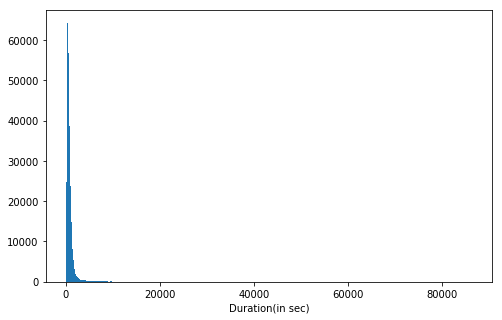

In [10]:
binsize = 100
bins = np.arange(0, trip['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = trip, x = 'duration_sec', bins = bins)
plt.xlabel('Duration(in sec)')
plt.show()

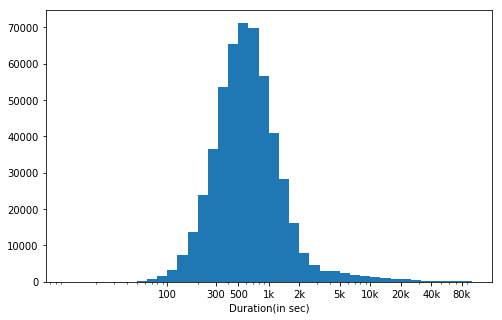

In [11]:
# there's a long tail in the distribution, so I will convert it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(1, np.log10(trip['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 300, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [100, 300, 500,'1k', '2k', '5k', '10k', '20k','40k','80k'])
plt.xlabel('Duration(in sec)')
plt.show()

Duration has a long tail distribution. When plotted on a log-scale, the distribution seems to be unimodal, with most values falling into the range 400-600 sec. After 1000 sec, the frequency starts dropping greatly.<br>

Next up, explore the first variable that might influence duration_time: start_time. 

(array([19221., 36747., 47318., 55692., 66065., 62971., 65916., 59761.,
        61790., 44219.]),
 array([736508.40805957, 736527.06718563, 736545.72631169, 736564.38543775,
        736583.0445638 , 736601.70368986, 736620.36281592, 736639.02194198,
        736657.68106803, 736676.34019409, 736694.99932015]),
 <a list of 10 Patch objects>)

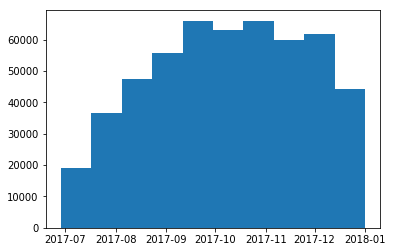

In [12]:
plt.hist(data=trip, x='start_time')

The distribution shows seasonal evolution of popularity for bike trip. September, October and November are the three months that received most usage. A relative smaller amount of trips recorded in July, August and December might be due to weather factor (Either it's too hot or cold to cycle outdoor).<br>
However, with current timestamp variable plotted above, I cannot observe the influence of weekdays on bike usage. I will add one more column to further explore this factor. 

In [13]:
# creat a new column to specify days of week based on start_time
weekdays={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
trip['weekday'] = trip['start_time'].dt.weekday.map(weekdays)

Text(0.5, 0, 'Days of week')

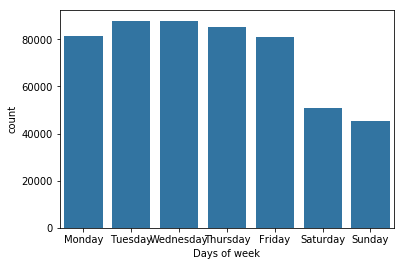

In [14]:
# setup weekday as ordinal variable and plot
weekday_cat = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
order_week = pd.api.types.CategoricalDtype(ordered=True, categories=weekday_cat)
trip['weekday']=trip['weekday'].astype(order_week)
base_color=sb.color_palette()[0]
ax = sb.countplot(data=trip, x='weekday',color=base_color)
ax.set_xlabel('Days of week')

The distribution reflects a much more frequent bike trips on weekdays than weekend. 

I will move on the the next variable: user_type.

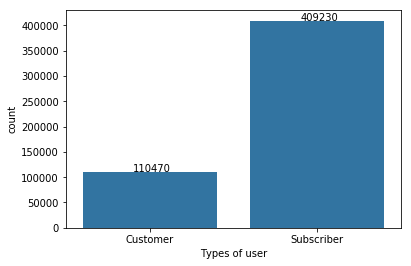

In [15]:
# creat countplot for categorical variable user_type
ax = sb.countplot(data=trip, x='user_type',color=base_color)
ax.set_xlabel('Types of user')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),(p.get_x()+0.3, p.get_height()+4))

409230 users in dataset are subscribers, contrary to 110470 casual customers. 

Now I will have a look at station variables to see if they hold any interesting properties. <br>

In [16]:
trip[['start_station_id','end_station_id']] = trip[['start_station_id','end_station_id']].astype(int)

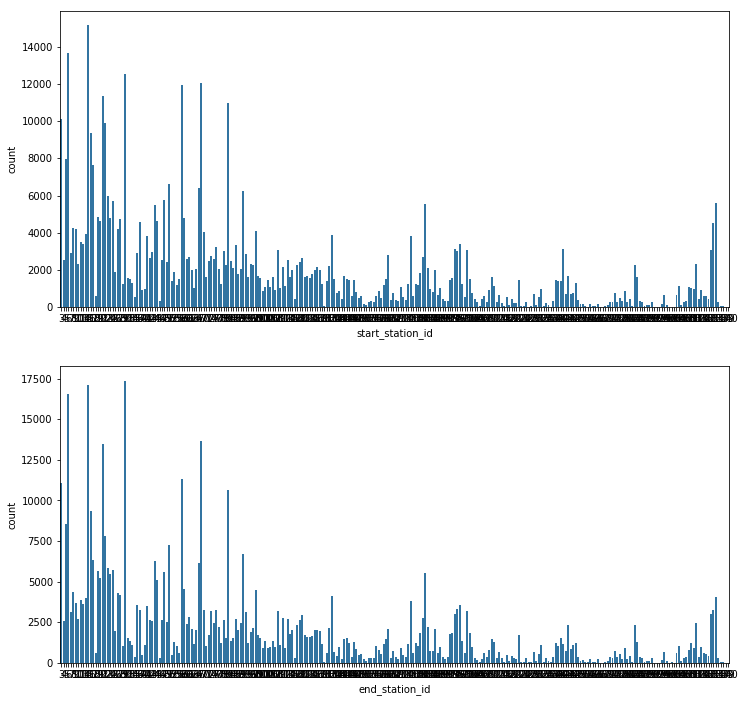

In [17]:
fig, ax = plt.subplots(nrows=2, figsize = [12,12])
sb.countplot(data=trip, x='start_station_id', color=base_color, ax=ax[0])
sb.countplot(data=trip, x='end_station_id', color=base_color, ax=ax[1])

By checking start and end station id variables alone, I found that there is huge gap of usage between different stations to start and end the bike trip. Since it's a univariate exploration, I won't go deeper from here. Bare this in mind that station variable could be a differentiator in the analysis of trip records. 

Now I will have a look at latitude and longitude variables. Latitude and longitude values could be used to get the exact location, if I have values of both start point and end point, I could use them to calculate the distance of the trip, which might be a very important numeric variable to analyze the duration.

In [18]:
# use the following code to calculte distance 
def distance(lat1, lon1,lat2, lon2):
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

In [19]:
trip.start_station_latitude[1]

37.7848720844

In [20]:
# I will use a loop to calculate the distance value for each entry 
ds=[]
for i in range(519700):
    lat1 = trip.start_station_latitude[i]
    lon1 = trip.start_station_longitude[i]
    lat2 = trip.end_station_latitude[i]
    lon2 = trip.end_station_longitude[i]
    ds.append(distance(lat1, lon1,lat2, lon2))

In [21]:
# create a new column to store the value of distance
trip['distance_km'] = ds

Text(0.5, 0, 'Trip distance in km')

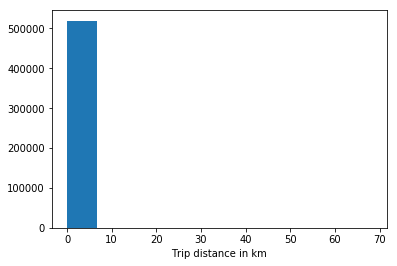

In [22]:
# explore distance variable 
plt.hist(data=trip, x='distance_km')
plt.xlabel('Trip distance in km')

The hist plot shows that most values of distance variable falls under 10km. There might be some outlier that creat a long tail in the plot. I will zoom in the part under 10km to further explore.

(0, 8)

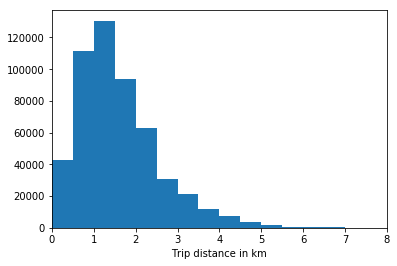

In [23]:
bins = np.arange(0,8,0.5)
plt.hist(data=trip, x='distance_km',bins=bins)
plt.xlabel('Trip distance in km')
plt.xlim((0,8))

After setting up x-axis limit and bins, the hist plot shows that the distribution of distance variable looks slightly right-skewed and unimodal, with peak in the range 1-1.5km. After 1.5km, the frequence falls steeply with tiny amount of points with value over 6km. 

### Conclusion of univariate exploration

#### Transformation 
The duration_sec variable took on a large range of values, so I looked at the data using a log transform. After transformation, the distribution seems unimodal, with peak range between 400-600 sec.

#### Operation to clean and ajuste data
The data type of start_time and end_time variables was originally of int type. I converted it to datetime type for further exploration. In the exploration, the countplot of timestamp was shown on a monthly basis due to numerous data input. This is helpful to observe sesonnal influence but restricts my exploration on weekdays. I created a new column in dataset to record weekday values of trips and found out that there's larger frequence of trips on weekdays than weekend.<br>
The original dataset lacks distance variable but contains geolocation information of starting and ending point of each trip under the the variables start_station_latitude/longitude, end_station_latitude/longitude. I calculated distance value for each entry based on these existing variables and created a new column in the dataset named 'distance_km'. 

## Bivariate Exploration
In this section, I will further explore if there is any correlation between the variable of my intest: duration_sec (numeric) and other variables : distance_km (numeric), user_type(categorical), start_time and weekday(categorical), station_id (categorical).

To start off with, I will explore the correlation between two quantitative variabes: duration_sec and distance_km

Text(0, 0.5, 'Duration of trip in sec')

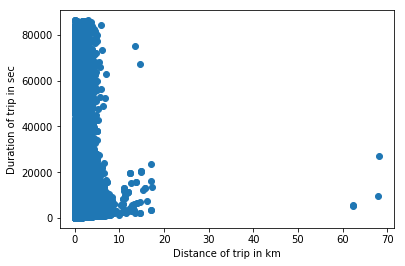

In [24]:
plt.scatter(data=trip, x='distance_km', y='duration_sec')
plt.xlabel('Distance of trip in km')
plt.ylabel('Duration of trip in sec')

As noticed in the univariate exploration, the large range of values in duration and some outliers in distance made the plot above hard to interprete. I will transform the y-axis on a log scale by defining a transform function for further exploration with other variables and take only values under 10km for distance variable. 

In [25]:
# define log transformation function
def log_trans(x, inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
# create subset to filter out distance value over 10km
distance_outliers = (trip['distance_km'] > 10)
print(distance_outliers.sum())
trip_sub = trip.loc[-distance_outliers,:]

67


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


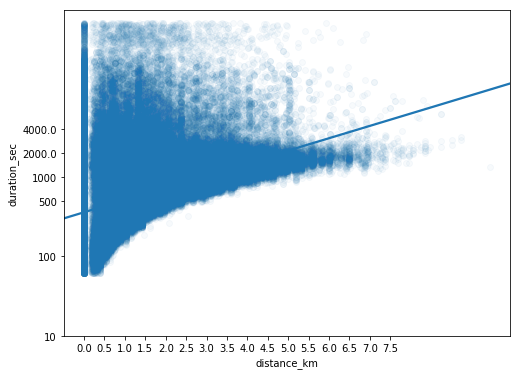

In [26]:
plt.figure(figsize=[8,6])
sb.regplot(trip_sub['distance_km'], trip_sub['duration_sec'].apply(log_trans),
          scatter_kws={'alpha':1/30})
xticks = np.arange(0,8,0.5)
tick_locs = [10,100,500,1000,2e3,4e3]
plt.yticks(log_trans(tick_locs),tick_locs)
plt.xticks(xticks, xticks)

plt.show()

It seems that there's positive correlation between distance and duration, especially in the range of 0.5-3.5km, as indicated by regression line. <br>
**Note:** I also tried to plot these two variables via a heat map with following code. The positive correlation is also more observable in the distance range of 0.5-3.5, with obvious overlapping in the range of 0.5-1.5. <br>
**I am not sure if we could define this as linear relationship in this case?**

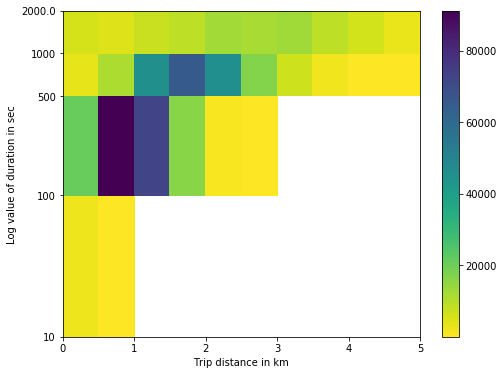

In [27]:
plt.figure(figsize=[8,6])
xbins = np.arange(0,8,0.5)
ybins = np.log10([10,100,500,1000,2e3])
plt.hist2d(data=trip_sub, x=trip_sub['distance_km'], y=trip_sub['duration_sec'].apply(log_trans),
          bins=[xbins,ybins],cmap='viridis_r',cmin=0.5)
yticks = [10,100,500,1000,2e3]
plt.yticks(log_trans(yticks),yticks)
plt.xlabel('Trip distance in km')
plt.ylabel('Log value of duration in sec')
plt.xlim((0,5))
plt.colorbar()

Next, correlation between duration_sec and categorical variable user_type.

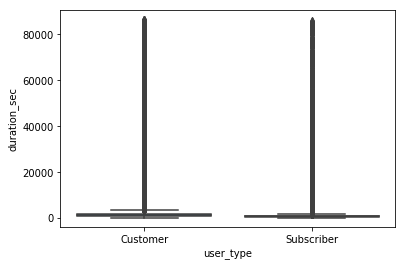

In [28]:
# use boxplot to explore corelation between a qualitative variable and a quantitative variable
sb.boxplot(data=trip, x='user_type', y='duration_sec')

This distribution does not make sense for observation. It took this shape because the large range in duration_sec. I will transform it on log scale and zoom in y axis.

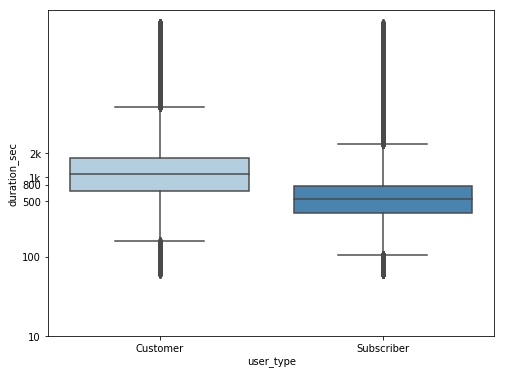

In [51]:
plt.figure(figsize=(8,6))
g = sb.boxplot(data=trip, x='user_type', y=trip['duration_sec'].apply(log_trans), palette='Blues')
g.set_yticks(log_trans(np.array([10,100,500,800,1000,2e3])))
g.set_yticklabels([10,100, 500, 800,'1k', '2k'])

plt.show()

The boxplot shows that the trip duration of casual customer users last longer (with median of approximately 1000 seconds) on average than that of subsribers (with median between 500-800 seconds). 

Now I am moving on to the next bivariate set: duration_sec and weekday(categorical)

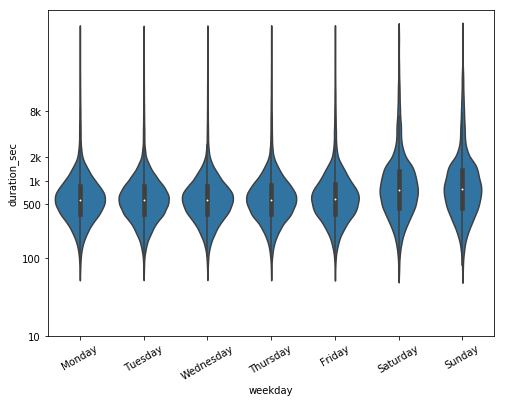

In [30]:
plt.figure(figsize=(8,6))
g = sb.violinplot(data=trip, x='weekday', y=trip['duration_sec'].apply(log_trans),color=base_color)
g.set_yticks(log_trans(np.array([10,100,500,1000,2e3,8e3])))
g.set_yticklabels([10,100, 500,'1k', '2k','8k'])
plt.xticks(rotation=30)

plt.show()

It appears that trip duration on weekdays is shorter on average than that on weekends.

After exploring the relationship of one numeric variable (duration_sec) with one numeric variable(distance_km) and two categorical variables(user_type and weekday), I am curious to know the relationship of second numeric varible (distance_km) with two other categorical variables, and how two categorical variables correlate in this dataset.<br>
Let's move on to see if there's something interesting behind. 

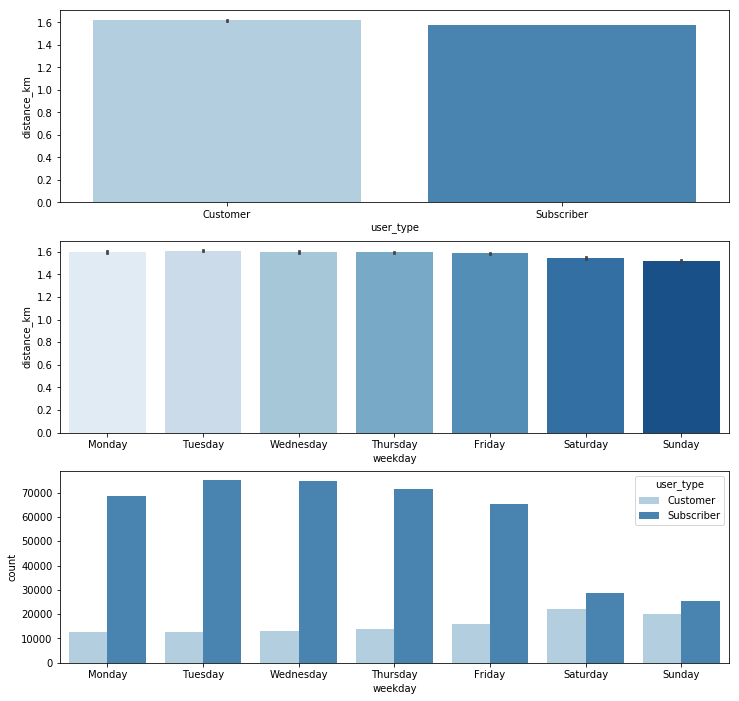

In [31]:
# create 3 subplots to quickly explore
plt.figure(figsize = [12, 12])

# subplot 1: distance vs user_type
plt.subplot(3, 1, 1)
sb.barplot(data=trip_sub, x='user_type', y='distance_km',palette = 'Blues')

# subplot 2: distance vs weekday
plt.subplot(3, 1, 2)
sb.barplot(data=trip_sub, x='weekday', y='distance_km',palette = 'Blues')

# subplot 3: user_type vs weekday
plt.subplot(3, 1, 3)
sb.countplot(data=trip_sub, x='weekday', hue='user_type', palette = 'Blues')

Since casual customers have also longer trip duration, their trip distance of causual customers is expected to be longer than that of subsribers as shown on first subplot. <br>
Interestingly, the distance made during trips on weekdays is generally longer than that on weekdend, contrary to the result in duration comparison. It suggests that the average speed of trips is very likely to be higher on weekdays than on weekend. <br>
The number of subscriber users is larger on every day of the week compared to the number of casual customers, but drops to a similar level on weekend. User size of casual customers takes increasing pattern on weekend. 

### Conclusion

#### How does variable of interest (duration_sec) vary with other features in the dataset?
After transforming the duration in log, an positive correlation is oberserved between duration and distance, especially between the distance range of 0.5-3.5km, where a high percentage of points falling in. 
Duration varies depending on user types and weekdays, indicating that there's some correlation as well: casual customers generally have longer trip duration than subsriberstrips; trips occruing on weekend last on average longer than on weekdays.

#### Is there any interesting observation between the other features?
I have explored the relationship of a second numeric variable(distance_km) with other two categorical varialbes (user_type and weekday). To summarize, a longer distance pattern is observed among casual customers compared to subscribers, and on weekdays compared than weekend. However, the gap tends to narrow down between two customer groups on weekend.  

## Multivariate Exploration
The main thing I plan to explore in this part is how the two categorical variables (user_type and weekday) influence duration.

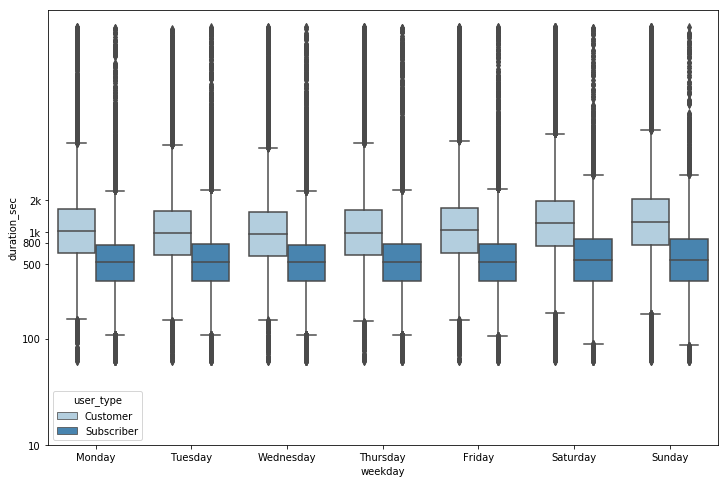

In [50]:
plt.figure(figsize=(12,8))
g = sb.boxplot(data=trip, x='weekday', y=trip['duration_sec'].apply(log_trans),hue='user_type',palette='Blues')
g.set_yticks(log_trans(np.array([10,100,500,800,1000,2e3])))
g.set_yticklabels([10,100, 500, 800,'1k', '2k'])

plt.show()

The box plot has combined two categorical variabels and shows the evlolution of duration across user group and weekdays. While the comparison between user groups is quite clear, the changes within one group across weekdays are too tiny to observe due to long-tail distraction from outliers. I will focus on distance values in the range of 500-2000 seconds and compute the mean to see the evolution across weekdays is more clear. 

In [43]:
# select duration values between 500 and 2000 secs
duration_range = (trip_sub['duration_sec'] >= 500) & (trip_sub['duration_sec'] <= 2000)
trip_1c = trip_sub.loc[duration_range,:]

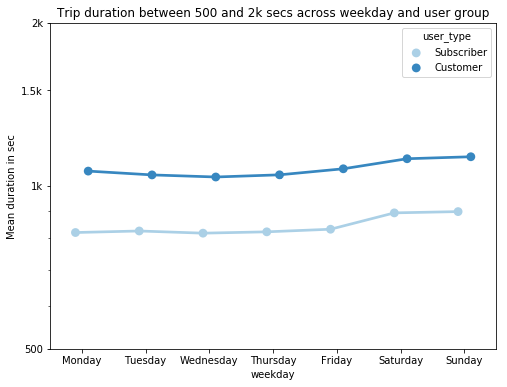

In [45]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = trip_1c, x = 'weekday', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', dodge = 0.2)
plt.title('Trip duration between 500 and 2k secs across weekday and user group')
plt.ylabel('Mean duration in sec')
plt.yscale('log')
plt.yticks([500, 1000, 1500, 2000], [500, '1k', '1.5k', '2k'])
ax.set_yticklabels([],minor = True)
plt.show();

As we can see on the point plot, the average duration of casual customers' trips is around 1100 seconds compared to 800 seconds for subsriber group.  Increasing duration time on weekend is a shared pattern for both two groups.<br>
Similarly, I am wondering the evolution in distance across these two categorical features as well. 

In [47]:
# select only values in distance under 8km
distance_range = (trip_sub['distance_km'] >= 0) & (trip_sub['distance_km'] <= 8)
trip_dis = trip_sub.loc[distance_range,:]

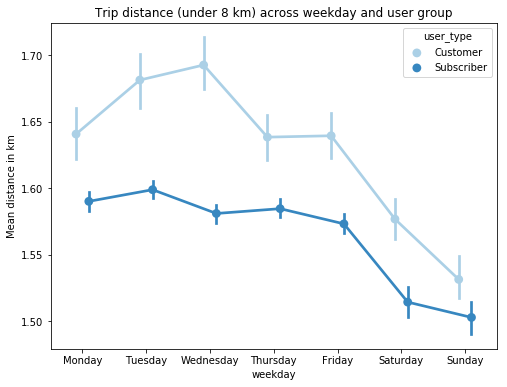

In [49]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = trip_dis, x = 'weekday', y = 'distance_km', hue = 'user_type',
           palette = 'Blues', dodge = 0.2)
plt.title('Trip distance (under 8 km) across weekday and user group')
plt.ylabel('Mean distance in km')
ax.set_yticklabels([],minor = True)

plt.show();

I found out in bivariate analysis that customer's trip distance is on average longer than that of subsriber's trip. <br>But how much more? Is the gap constant across weekdays?
<br>The distribution for trip under 8kms shows that on weekdays casual customer usually rides more than 1.6km on average while subscribers under 1.6km most of the time. Distance peak is observed relatively on Wednesday and Tuesday for customer group and subsriber, while lowest level is reached both on Sunday, closed to 1.5km. 

### Conclusion

#### Is the multivariate exploration aligned with the result observed from bivariate exploration?
Yes. As concluded in bivariate exploration analysis, trip duration is longer in customer group than in subsriber, with small fluctuations across weekdays and slight increase on weekend. With a closer look at duration in the range of 500-2000 seconds and distance of trips under 8km, I found out that the difference in duration between groups remain consistant, whichever the day of the week. It further confirms the conclusion from previous part.<br>

#### Is there any new findings that have been hidden in bivariate exploration?
Yes. The difference in distance between two groups and across days is barely noticable on the barchart of bivariate plot. The multivariate exploration under smaller sample range (only trips with distance under 8km are selected) gave a more clear and detailed evolution across days and groups. 